In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/prateekcsit/Machine-Learning/master/Lemonade.csv')
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18
...,...,...,...,...,...,...,...
360,27/12/2017,Wednesday,42.7,1.00,33,0.3,19
361,28/12/2017,Thursday,37.8,1.25,32,0.3,16
362,29/12/2017,Friday,39.5,1.25,17,0.3,15
363,30/12/2017,Saturday,30.9,1.43,22,0.3,13


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [3]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Day          365 non-null    object        
 2   Temperature  365 non-null    float64       
 3   Rainfall     365 non-null    float64       
 4   Flyers       365 non-null    int64         
 5   Price        365 non-null    float64       
 6   Sales        365 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 20.1+ KB


In [5]:
df['Date']

0     2017-01-01
1     2017-01-02
2     2017-01-03
3     2017-01-04
4     2017-01-05
         ...    
360   2017-12-27
361   2017-12-28
362   2017-12-29
363   2017-12-30
364   2017-12-31
Name: Date, Length: 365, dtype: datetime64[ns]

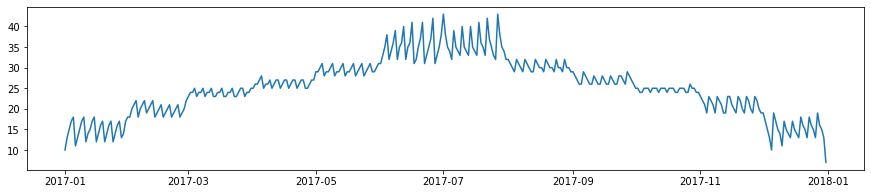

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.plot(df['Date'],df['Sales'])
plt.show()

In [7]:
smax = df['Sales'].max()

In [8]:
df[df['Sales']==smax]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,2017-07-01,Saturday,102.9,0.47,59,0.5,43
207,2017-07-27,Thursday,97.9,0.47,74,0.5,43


In [9]:
smin = df['Sales'].min()

In [10]:
df[df['Sales']==smin]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,2017-12-31,Sunday,15.1,2.5,9,0.3,7


In [11]:
df['Day'].value_counts()

Sunday       53
Wednesday    52
Friday       52
Monday       52
Saturday     52
Tuesday      52
Thursday     52
Name: Day, dtype: int64

In [12]:
df.groupby(df['Day']).mean()

,Temperature,Rainfall,Flyers,Price,Sales
Day,,,,,
Friday,61.134615,0.817115,40.326923,0.330769,25.384615
Monday,60.888462,0.823462,39.788462,0.334615,25.461538
Saturday,60.930769,0.823077,38.403846,0.334615,25.346154
Sunday,59.769811,0.873585,40.320755,0.333962,24.830189
Thursday,61.125000,0.812500,40.711538,0.334615,25.673077
Tuesday,59.944231,0.829423,41.057692,0.334615,25.134615
Wednesday,61.344231,0.806154,41.384615,0.334615,25.442308


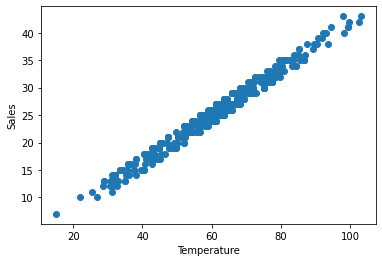

In [13]:
# Step 1
plt.scatter(df['Temperature'],df['Sales'])
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.show()

# Positive correlation

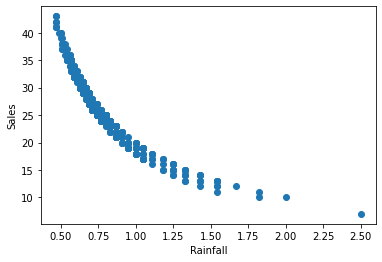

In [14]:
plt.scatter(df['Rainfall'],df['Sales'])
plt.xlabel('Rainfall')
plt.ylabel('Sales')
plt.show()

# Negative correlation

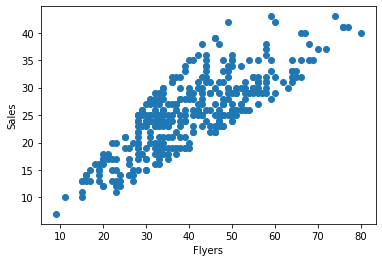

In [15]:
plt.scatter(df['Flyers'],df['Sales'])
plt.xlabel('Flyers')
plt.ylabel('Sales')
plt.show()

# Positive correlation

<AxesSubplot:>

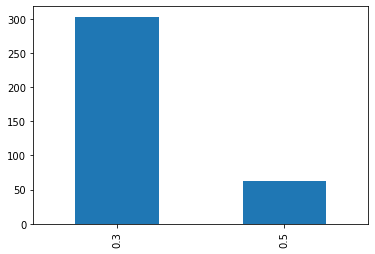

In [16]:
df['Price'].value_counts().plot(kind='bar')

In [17]:
# y = mx+c
# y = m1x1 + m2x2 + m3x3 + m4x4 + c

# c = Y-intercept
# m1,m2,m3,m4 = Slopes

In [18]:
# Step 2:
# Considering input and output from the dataset

x = df[['Temperature','Rainfall','Flyers','Price']].values
y = df['Sales'].values

In [19]:
# Step 3: Divide data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [21]:
print(x_train.shape)
print(x_test.shape)

(273, 4)
(92, 4)


In [22]:
# Step 4
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train) # Only training data shld be considered

LinearRegression()

In [23]:
m = model.coef_
m

array([ 0.36848105, -2.54016824,  0.02256083,  1.48908515])

In [24]:
c = model.intercept_
c

3.6289348153280727

In [25]:
# Step 5
y_pred = model.predict(x_test)
y_pred

array([33.00261012, 20.96433145, 11.65055939, 21.40943257, 18.8842075 ,
       34.5671284 , 22.55039576, 27.71064323, 33.10151667, 29.21316072,
        7.80730634, 18.14950524, 22.0616028 , 17.63286598, 30.10010709,
       23.93909431,  9.28272462, 24.62467203, 20.39881669, 27.22935803,
       18.14506858, 35.02840051, 24.35887676, 28.38435949, 30.09668522,
       34.66487948, 32.23966533, 25.35412636, 14.65835216, 15.55098023,
       14.49816651, 25.35062148, 23.37986102, 17.5351149 , 33.18651863,
       27.09500784, 23.18575113, 15.92138906, 12.36848424, 22.71792319,
       28.8754564 , 13.53768997, 17.12986876, 25.58724243, 28.3640585 ,
       29.46768215, 23.97569341, 20.0754573 , 10.00527087, 21.66962915,
       29.43920936, 12.8948911 , 25.84167428, 28.22118576, 42.04158661,
       13.38476312, 25.85419971, 18.29020116, 11.61122115, 23.79120389,
       29.60464294, 12.45980662, 24.30983519, 19.99425329, 26.51371172,
       23.35278051, 28.88681981, 28.54411136, 37.53403273, 23.85

In [26]:
y_test

array([33, 21, 12, 22, 20, 35, 23, 27, 33, 29, 10, 19, 23, 18, 30, 25, 10,
       24, 19, 27, 18, 36, 23, 28, 29, 35, 32, 24, 15, 16, 16, 26, 22, 18,
       34, 27, 23, 17, 14, 22, 29, 15, 18, 24, 27, 29, 25, 19, 11, 20, 30,
       14, 25, 27, 42, 13, 27, 17, 13, 23, 30, 13, 24, 21, 28, 24, 29, 28,
       37, 23, 28, 34, 19, 32, 17, 42, 25, 25, 16, 14, 25, 27, 15, 27, 25,
       22, 23, 26, 25, 27, 19, 24], dtype=int64)

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.8349800596109107

In [28]:
z = 39.5,1.25,17,0.3
model.predict([z])


array([15.83898556])

In [29]:
print(m)

[ 0.36848105 -2.54016824  0.02256083  1.48908515]


In [30]:
m[0]

0.36848104770992335

In [31]:
#y = m0z0 + m1z1 + m2z2 + m3z3 + c

m[0] * z[0] +m[1] * z[1] + m[2] * z[2] + m[3] * z[3] + c


15.838985559691794